In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import wrangle as w
import explore as e

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

In [2]:
zillow = w.wrangle_zillow()

In [3]:
zillow.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


In [4]:
zillow.shape

(1854411, 7)

## 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

## 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [3]:
train, validate, test = w.train_validate_test_split(zillow)

In [18]:
train.shape, validate.shape, test.shape

((1205830, 7), (370419, 7), (278162, 7))

In [10]:
train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205830 entries, 1569291 to 789207
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bedrooms     1205830 non-null  float64
 1   bathrooms    1205830 non-null  float64
 2   square_feet  1205830 non-null  float64
 3   tax_value    1205830 non-null  float64
 4   year_built   1205830 non-null  float64
 5   taxamount    1205830 non-null  float64
 6   fips         1205830 non-null  float64
dtypes: float64(7)
memory usage: 73.6 MB


In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,1205830.0,3.214239,0.781804,2.00,3.00,3.00,4.0000,5.00
bathrooms,1205830.0,2.053627,0.707881,1.00,2.00,2.00,2.5000,4.00
square_feet,1205830.0,1653.611200,564.451251,1.00,1231.00,1548.00,1988.0000,3410.00
tax_value,1205830.0,327920.735279,199013.312250,22.00,173755.00,296502.50,452483.5000,950940.00
year_built,1205830.0,1959.442647,20.562522,1807.00,1949.00,1957.00,1972.0000,2016.00
taxamount,1205830.0,4068.852788,2242.823679,16.48,2364.86,3746.22,5486.6275,10377.84
fips,1205830.0,6048.343767,20.554449,6037.00,6037.00,6037.00,6059.0000,6111.00


In [7]:
train_sample = train.sample(frac=.25)

In [8]:
train_sample.shape

(301458, 7)

## 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [14]:
cols = train.columns.to_list()

cols.remove('tax_value')
cols.remove('fips')

In [15]:
cols

['bedrooms', 'bathrooms', 'square_feet', 'year_built', 'taxamount']

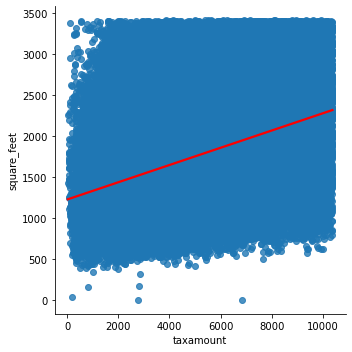

In [17]:
sns.lmplot(x="taxamount", y="square_feet", data=train_sample, line_kws={'color': 'red'})
plt.show()

In [53]:
def plot_variable_pairs(df, target):
    cols = df.columns.to_list()
    cols.remove(target)
    for col in cols:
        sns.lmplot(x=col, y=target, data=df, line_kws={'color': 'red'})
        plt.show()

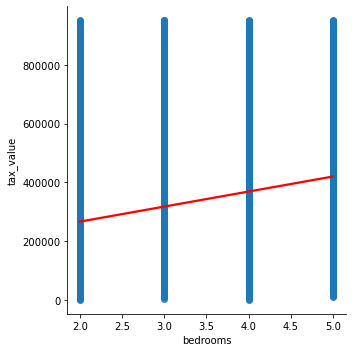

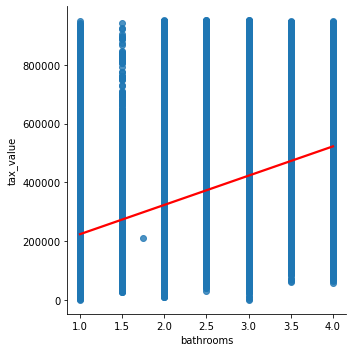

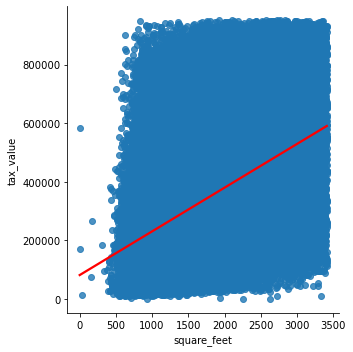

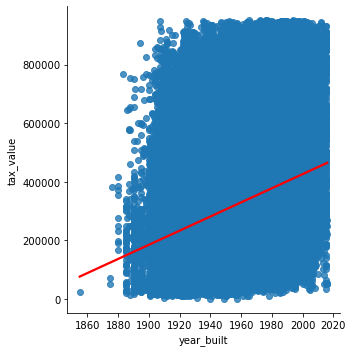

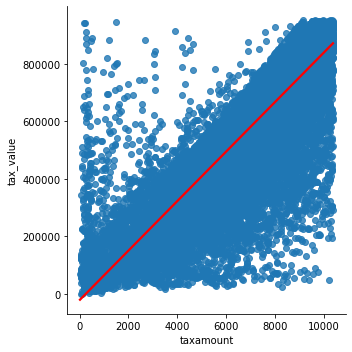

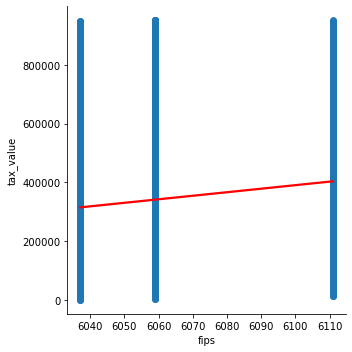

In [52]:
target = 'tax_value'

cols = train_sample.columns.to_list()
cols.remove(target)
cols

for col in cols:
    sns.lmplot(x=col, y=target, data=train_sample, line_kws={'color': 'red'})
    plt.show()

## 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [ ]:
sns.boxplot(x='bathrooms', y='square_feet', data=train)
plt.show()

In [ ]:
sns.violinplot(x='bathrooms', y='square_feet', data=train)
plt.show()

In [ ]:
sns.barplot(x='bathrooms', y='square_feet', data=train)
plt.show()

In [5]:
cat_vars = ['bathrooms', 'bedrooms', 'fips']
cont_vars = ['taxamount', 'tax_value', 'year_built']

In [29]:
def plot_categorical_and_continuous_vars(df, cat_vars, cont_vars):
    for col in cat_vars:
        for col2 in cont_vars:
            fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))
            fig.suptitle(f'{col} vs. {col2}')
            sns.boxplot(data=df, x=col, y=col2, ax=ax1)
            sns.violinplot(data=df, x=col, y=col2, ax=ax2)
            sns.barplot(data=df, x=col, y=col2, ax=ax3)
            plt.show()

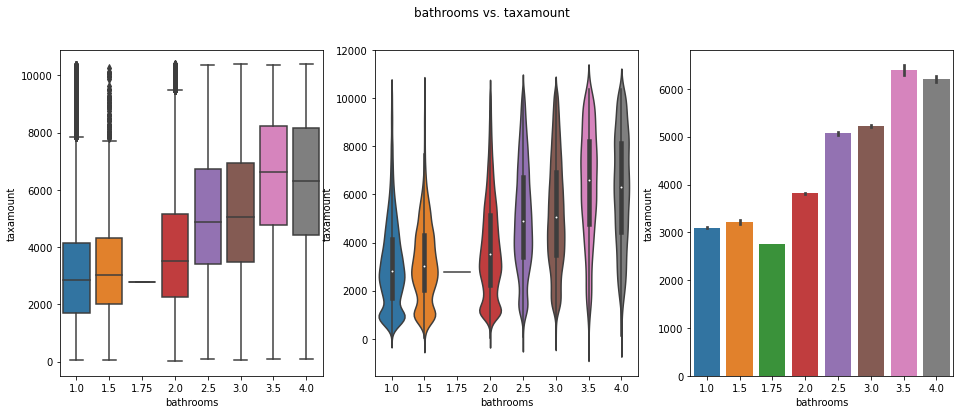

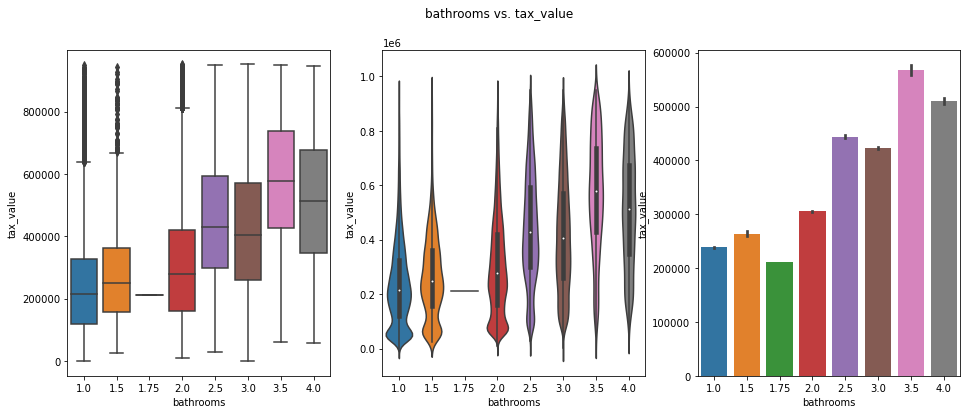

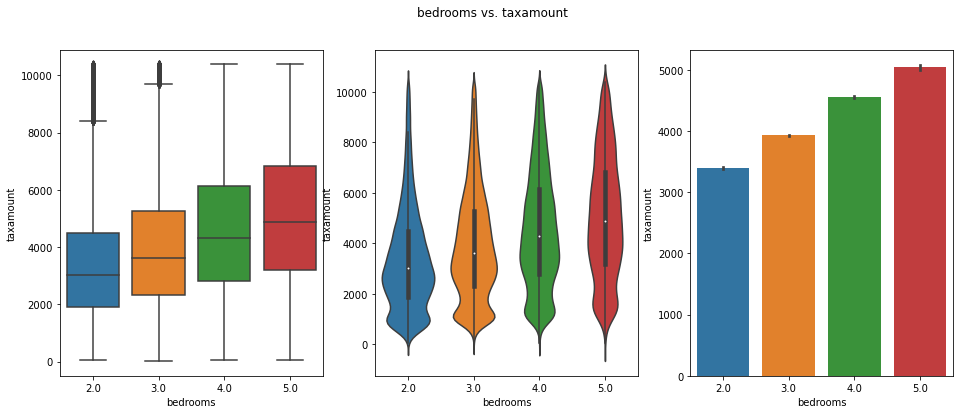

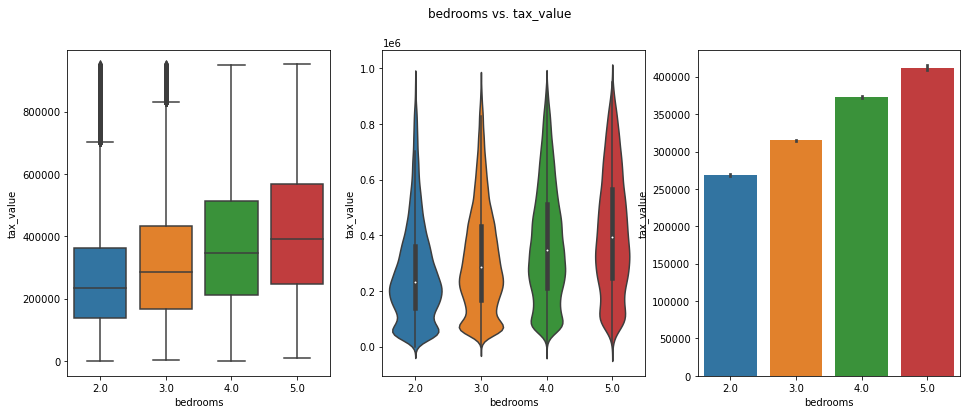

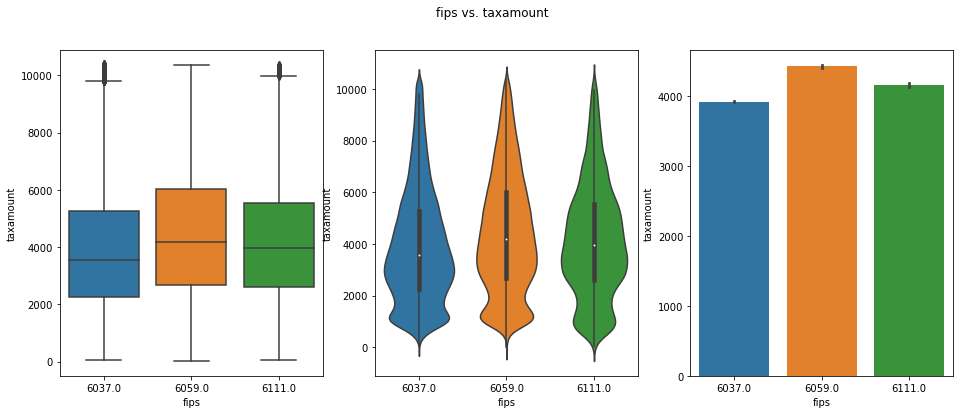

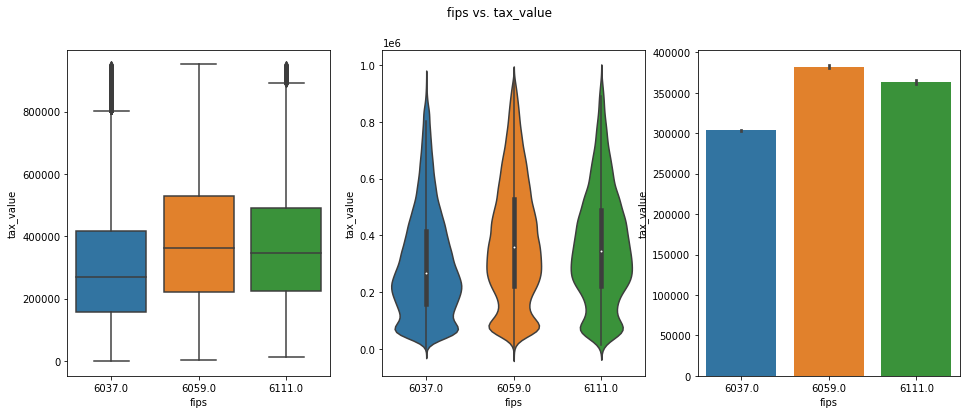

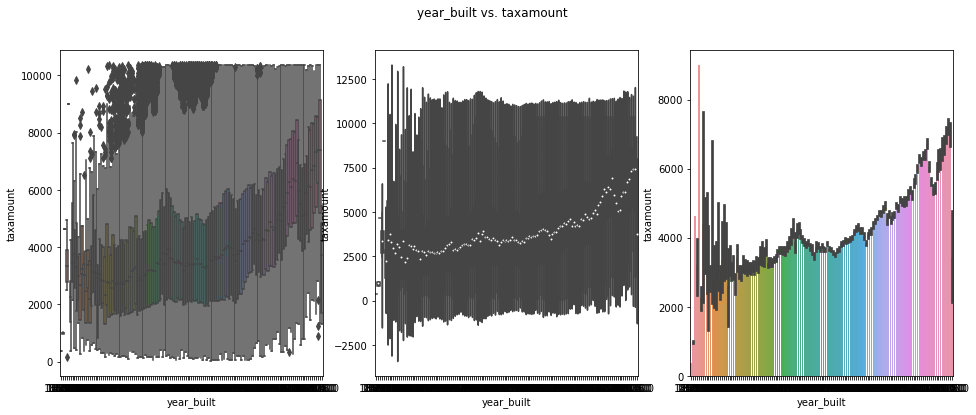

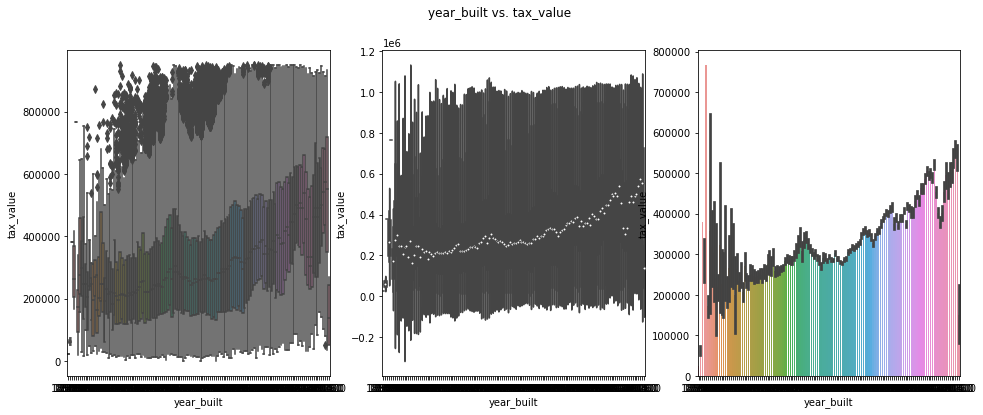

In [27]:
plot_categorical_and_continuous_vars(train_sample, cat_vars, cont_vars)

## 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

## 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

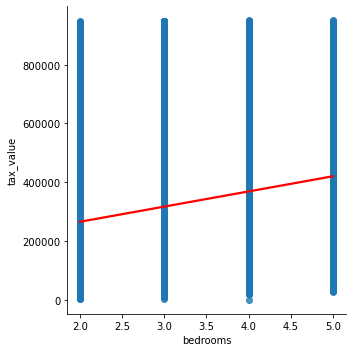

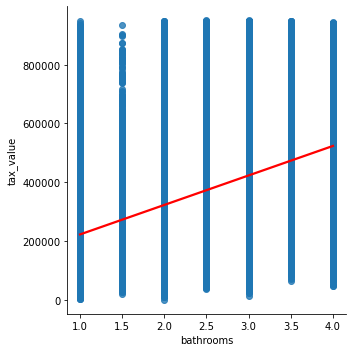

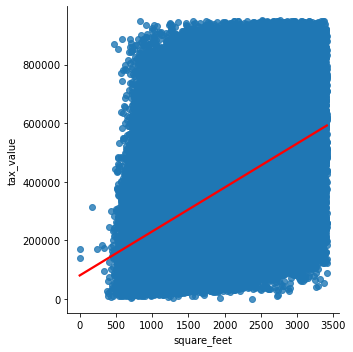

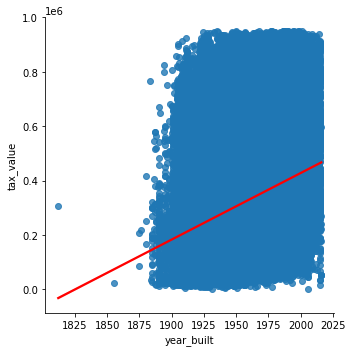

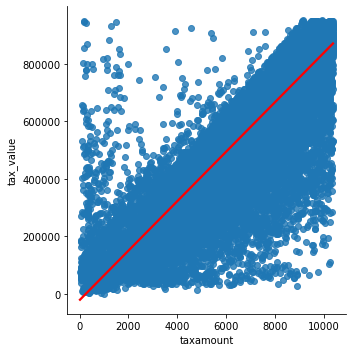

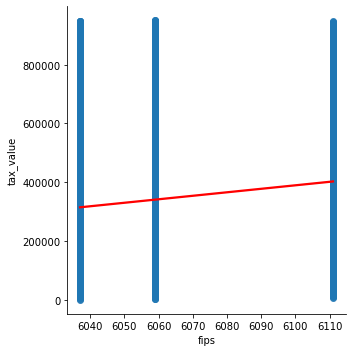

In [8]:
e.plot_variable_pairs(train_sample, 'tax_value')

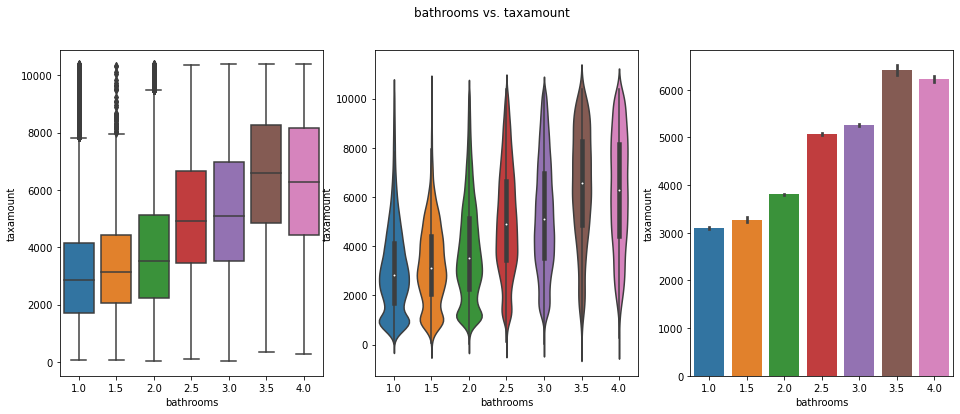

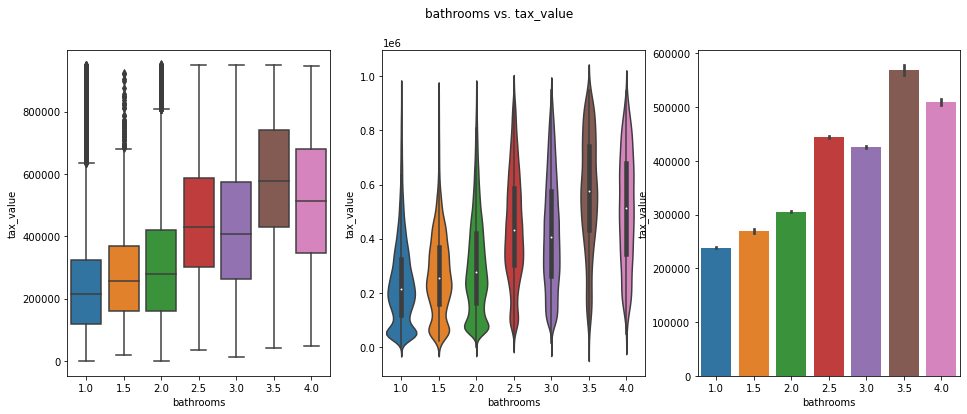

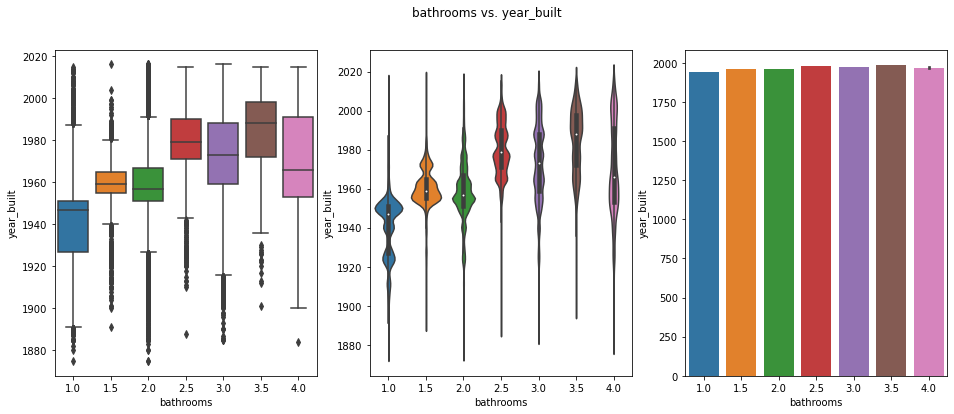

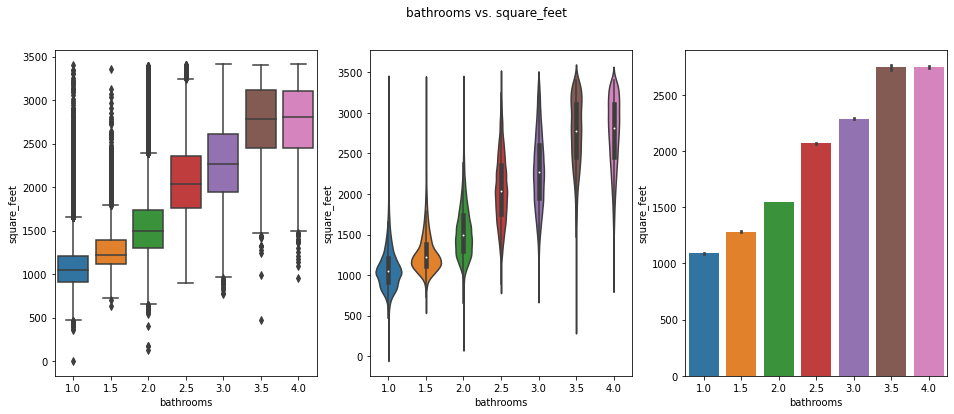

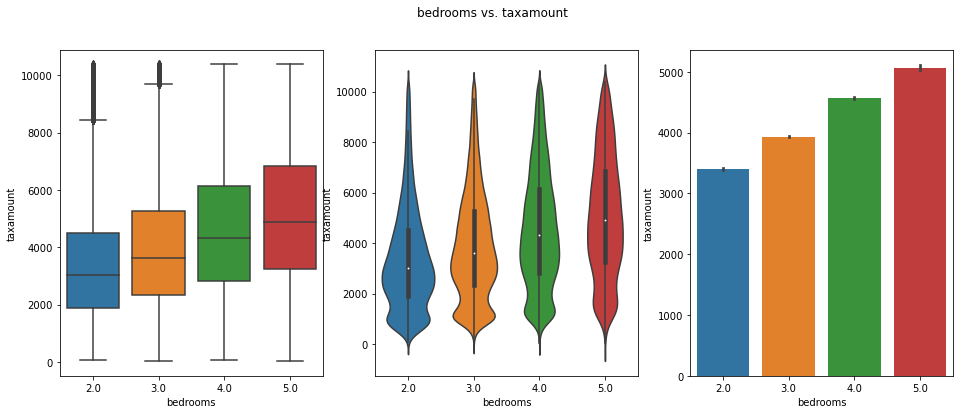

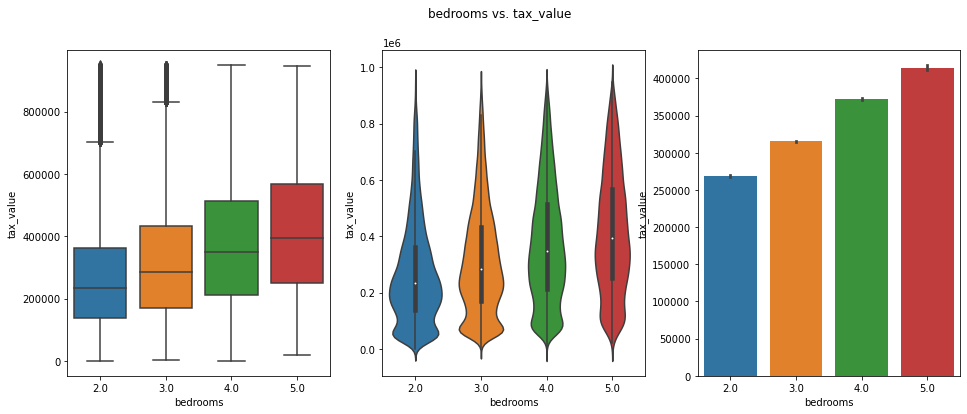

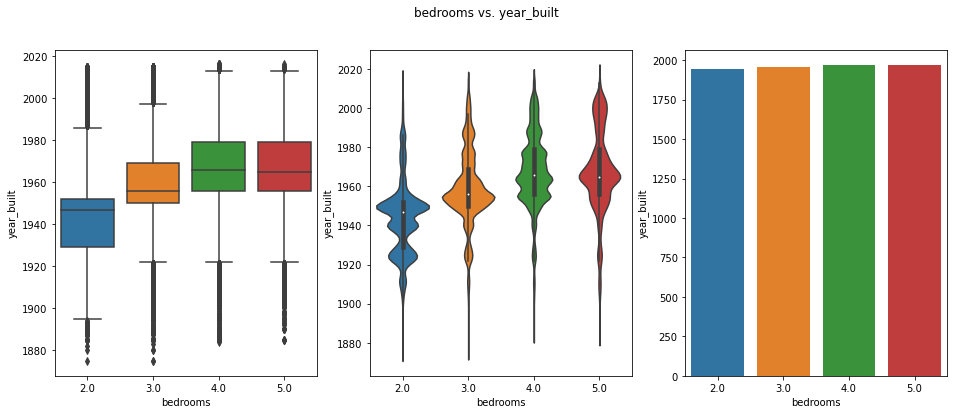

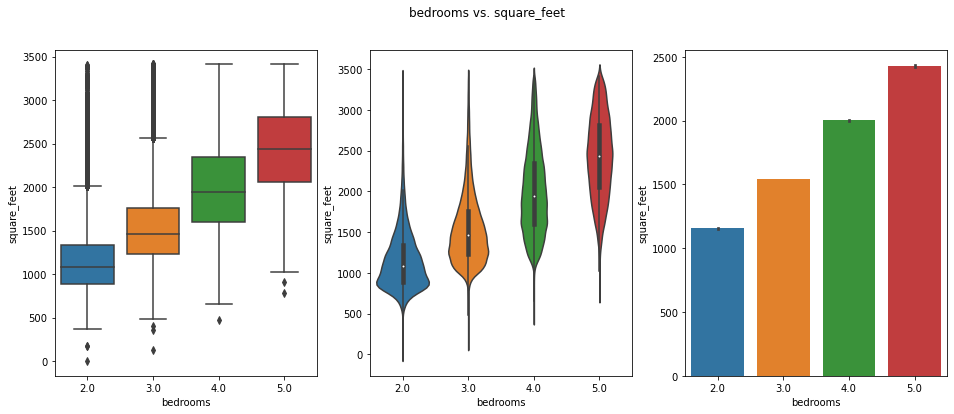

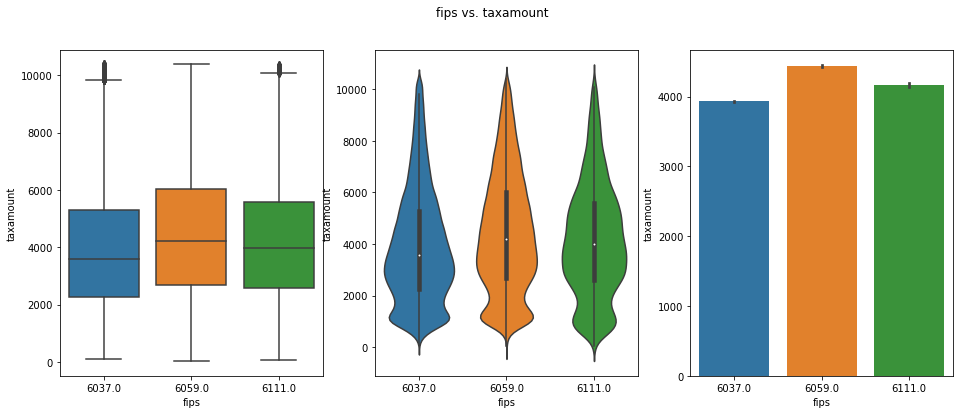

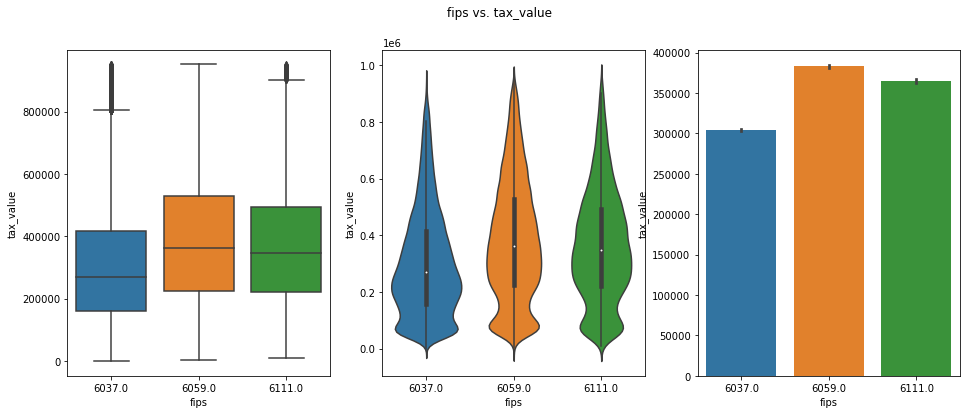

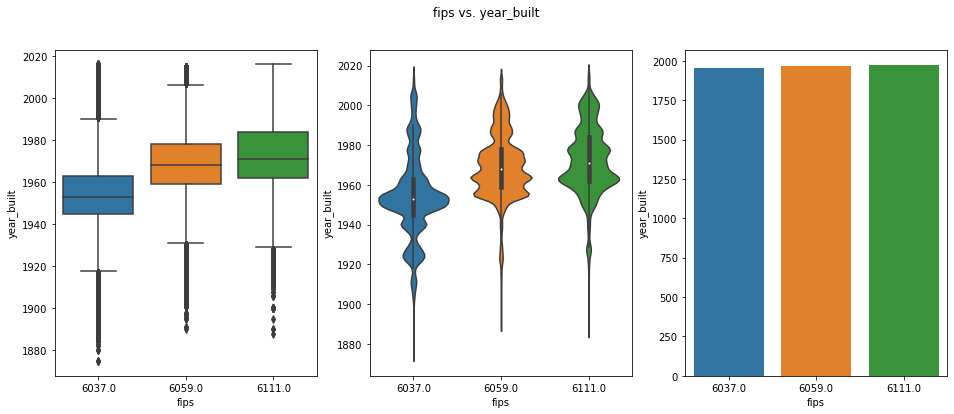

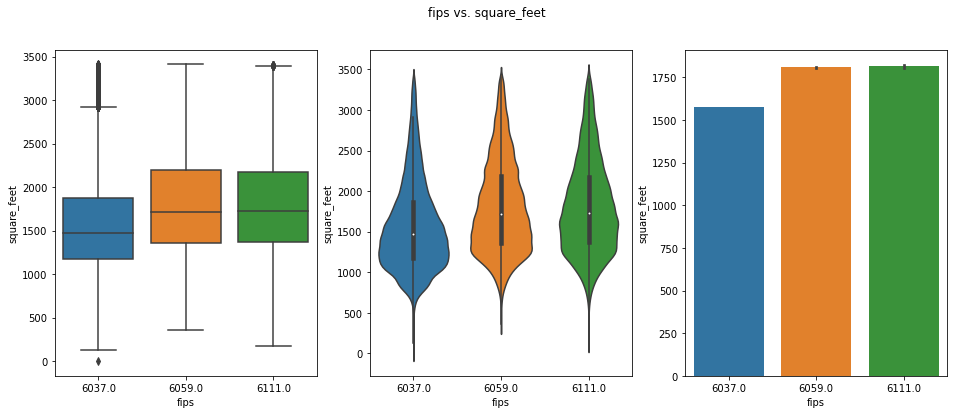

In [22]:
cat_vars = ['bathrooms', 'bedrooms', 'fips']
cont_vars = ['taxamount', 'tax_value', 'year_built', 'square_feet']

e.plot_categorical_and_continuous_vars(train_sample, cat_vars, cont_vars)


## 7. Come up with some initial hypotheses based on your goal of predicting property value.

$H_0$ = There is no linear correlation between square feet and tax value.

$H_A$ = There is a linear correlation between square feet and tax value.

## 8. Visualize all combinations of variables in some way.

In [9]:
train_spearman = train_sample.corr(method = 'spearman')
train_corr = train_sample.corr()
train_corr

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips
bedrooms,1.000000,0.579548,0.595529,0.202051,0.365153,0.201778,0.163053
bathrooms,0.579548,1.000000,0.762098,0.356287,0.534453,0.356153,0.142284
square_feet,0.595529,0.762098,1.000000,0.425315,0.465517,0.419611,0.154627
tax_value,0.202051,0.356287,0.425315,1.000000,0.248683,0.969832,0.124027
year_built,0.365153,0.534453,0.465517,0.248683,1.000000,0.252197,0.304176
taxamount,0.201778,0.356153,0.419611,0.969832,0.252197,1.000000,0.053755
fips,0.163053,0.142284,0.154627,0.124027,0.304176,0.053755,1.000000


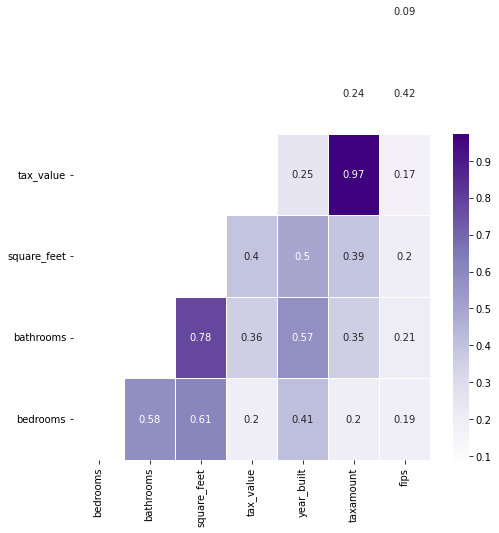

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(train_spearman, cmap='Purples', annot=True, linewidth=0.5, mask= np.tril(train_corr))
plt.ylim(0, 4)

plt.show()

## 9. Run the appropriate statistical tests where needed.

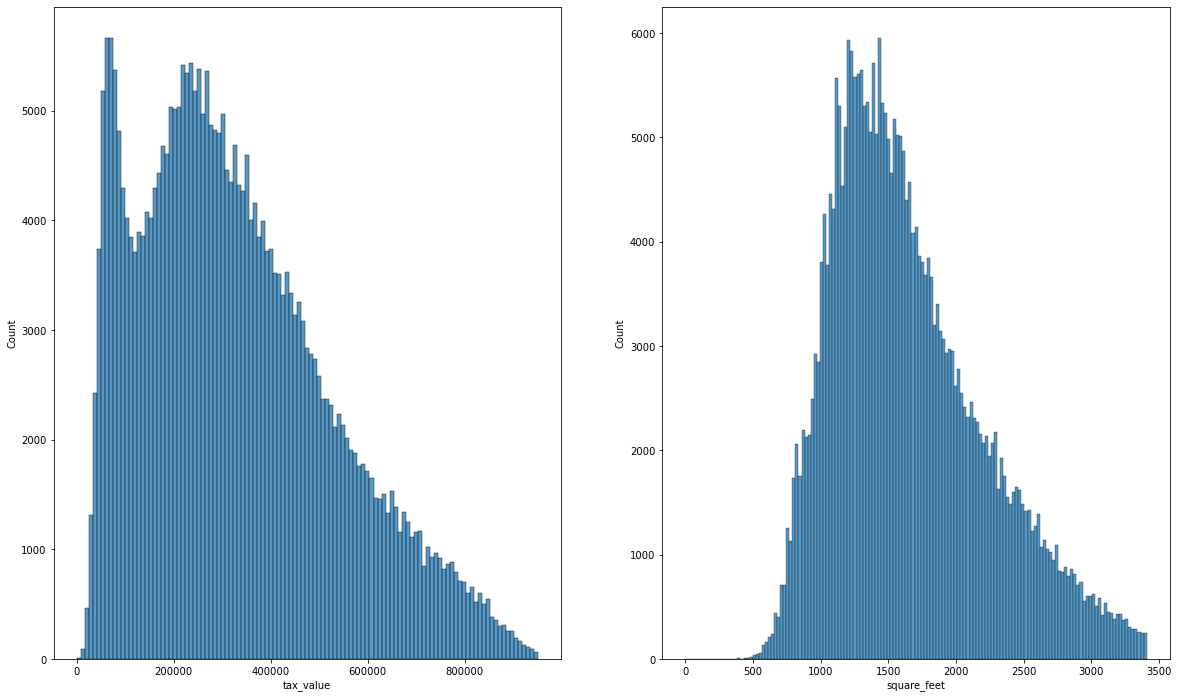

In [16]:
plt.figure(figsize = (20, 12))
plt.subplot(121)
sns.histplot(train_sample['tax_value'])

plt.subplot(122)
sns.histplot(train_sample['square_feet']);

***Not normal distribution so I need to use spearman test***

In [19]:
stats.spearmanr(train_sample['tax_value'], train_sample['square_feet'])




SpearmanrResult(correlation=0.39410898016358675, pvalue=0.0)

In [18]:
p_value

0.0

In [18]:
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.3954756678110477
P-value: 0.0


In [ ]:
#run an independent t-test
tstat, p = stats.ttest_ind(train_churn.tenure, train_no_churn.tenure, equal_var= False)
#print results
print(f"tstat: {tstat:.8}\np-value: {p:.4}")

## 10. What independent variables are correlated with the dependent variable, home value?

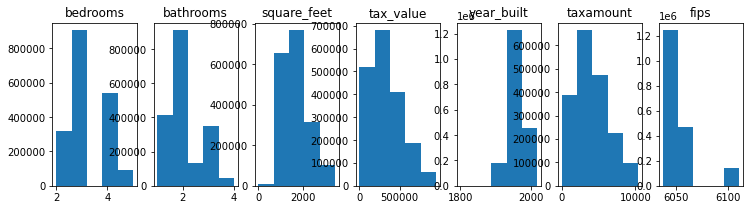

In [10]:
plt.figure(figsize=(16, 3))

# List of columns
cols = train_sample.columns.to_list()

for i, col in enumerate(cols):

    # i starts at 0, but plot numbers should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,9, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillow[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)

***Not normal distribution so I need to use spearman test***

In [14]:
for col in cols:
    r, p_value = stats.spearmanr(train_sample['tax_value'], 
                                 train_sample[col])
    print(f'Comparing tax_value with {col}')
    print(f'Correlation Coefficient: {r}\nP-value: {p_value}\n')
    print('---------------------------\n')

Comparing tax_value with bedrooms
Correlation Coefficient: 0.20256103257393165
P-value: 0.0

---------------------------

Comparing tax_value with bathrooms
Correlation Coefficient: 0.3560057415701068
P-value: 0.0

---------------------------

Comparing tax_value with square_feet
Correlation Coefficient: 0.39410898016358675
P-value: 0.0

---------------------------

Comparing tax_value with year_built
Correlation Coefficient: 0.2457834287677218
P-value: 0.0

---------------------------

Comparing tax_value with taxamount
Correlation Coefficient: 0.9729192015778118
P-value: 0.0

---------------------------

Comparing tax_value with fips
Correlation Coefficient: 0.16898233096691434
P-value: 0.0

---------------------------



**All of them have a correlation with ```tax_value```, but ```taxamount``` has the strongest correlation with a 0.969832 correlation coefficient.**

## 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [16]:
for col in cols:
    for col2 in cols:
        r, p_value = stats.spearmanr(train_sample[col], 
                                     train_sample[col2])
        print(f'Comparing {col} with {col2}')
        print(f'Correlation Coefficient: {r}\nP-value: {p_value}\n')
        print('---------------------------\n')

Comparing bedrooms with bedrooms
Correlation Coefficient: 1.0
P-value: 0.0

---------------------------

Comparing bedrooms with bathrooms
Correlation Coefficient: 0.5766566823911394
P-value: 0.0

---------------------------

Comparing bedrooms with square_feet
Correlation Coefficient: 0.6083715913917126
P-value: 0.0

---------------------------

Comparing bedrooms with year_built
Correlation Coefficient: 0.4122066038224132
P-value: 0.0

---------------------------

Comparing bedrooms with taxamount
Correlation Coefficient: 0.20221103502372312
P-value: 0.0

---------------------------

Comparing bedrooms with fips
Correlation Coefficient: 0.19255763153575256
P-value: 0.0

---------------------------

Comparing bathrooms with bedrooms
Correlation Coefficient: 0.5766566823911394
P-value: 0.0

---------------------------

Comparing bathrooms with bathrooms
Correlation Coefficient: 0.9999999999999998
P-value: 0.0

---------------------------

Comparing bathrooms with square_feet
Correlatio

**All of them have a correlation with each other, but the strongest correlations are:**
- Comparing square_feet with bathrooms
    - Correlation Coefficient: 0.7776605562419747
- Comparing square_feet with bedrooms
    - Correlation Coefficient: 0.6083715913917125

## 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

Still not completely sure but I feel that 

## 13. Explore your dataset with any other visualizations you think will be helpful.

taxamount
count    301458.000000
mean       4071.173418
std        2242.918985
min          29.140000
25%        2370.442500
50%        3750.295000
75%        5488.377500
max       10377.510000
Name: taxamount, dtype: float64


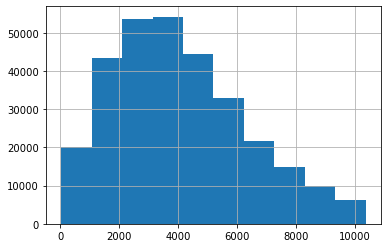

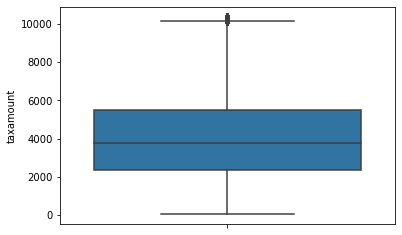

tax_value
count    301458.000000
mean     328166.420921
std      198967.346652
min        5299.000000
25%      174222.500000
50%      296782.500000
75%      452515.750000
max      950756.000000
Name: tax_value, dtype: float64


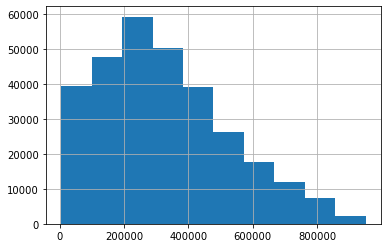

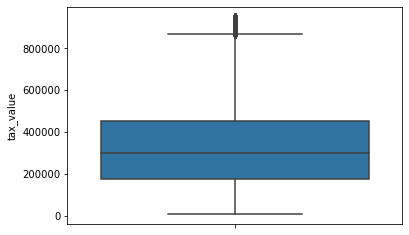

year_built
count    301458.000000
mean       1959.452998
std          20.559995
min        1807.000000
25%        1949.000000
50%        1957.000000
75%        1972.000000
max        2016.000000
Name: year_built, dtype: float64


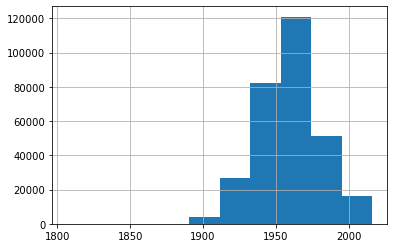

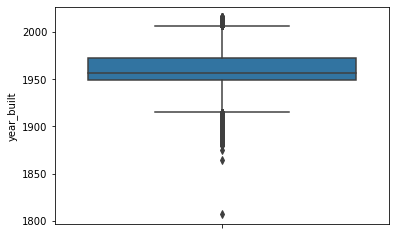

In [11]:
e.explore_num_uvar(train_sample, cont_vars)

taxamount
count    1.205830e+06
mean     4.068853e+03
std      2.242824e+03
min      1.648000e+01
25%      2.364860e+03
50%      3.746220e+03
75%      5.486628e+03
max      1.037784e+04
Name: taxamount, dtype: float64


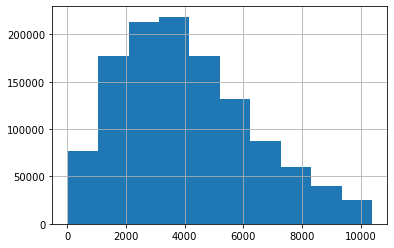

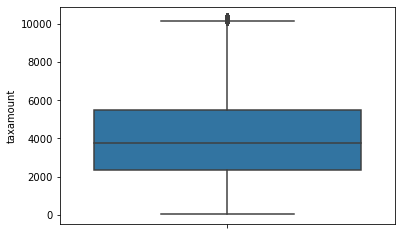

tax_value
count    1.205830e+06
mean     3.279207e+05
std      1.990133e+05
min      2.200000e+01
25%      1.737550e+05
50%      2.965025e+05
75%      4.524835e+05
max      9.509400e+05
Name: tax_value, dtype: float64


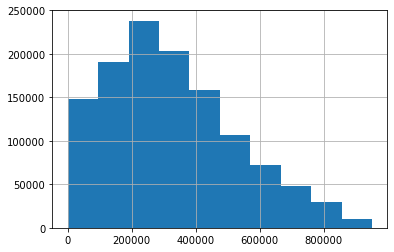

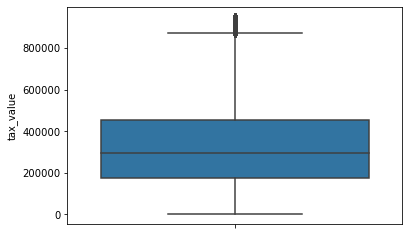

year_built
count    1.205830e+06
mean     1.959443e+03
std      2.056252e+01
min      1.807000e+03
25%      1.949000e+03
50%      1.957000e+03
75%      1.972000e+03
max      2.016000e+03
Name: year_built, dtype: float64


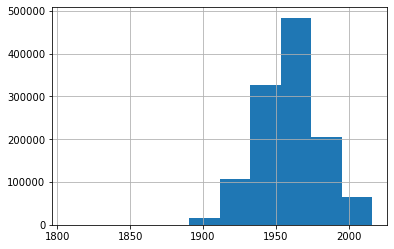

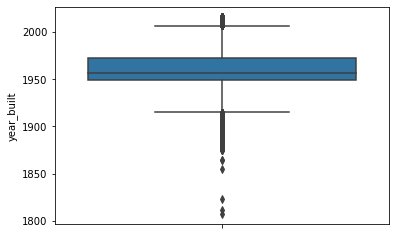

bathrooms
2.00    591187
1.00    250935
3.00    228869
2.50     85963
4.00     20802
1.50     19980
3.50      8091
1.75         3
Name: bathrooms, dtype: int64
2.00    49.027392
1.00    20.810147
3.00    18.980205
2.50     7.128949
4.00     1.725119
1.50     1.656950
3.50     0.670990
1.75     0.000249
Name: bathrooms, dtype: float64


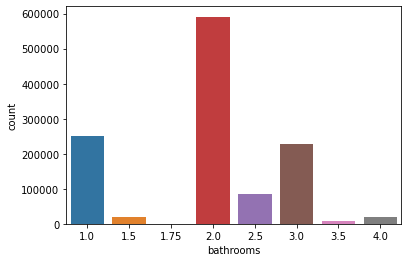

bedrooms
3.0    587856
4.0    350957
2.0    208885
5.0     58132
Name: bedrooms, dtype: int64
3.0    48.751151
4.0    29.105015
2.0    17.322923
5.0     4.820912
Name: bedrooms, dtype: float64


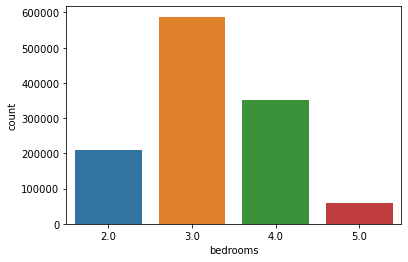

fips
6037.0    807465
6059.0    303853
6111.0     94512
Name: fips, dtype: int64
6037.0    66.963419
6059.0    25.198660
6111.0     7.837921
Name: fips, dtype: float64


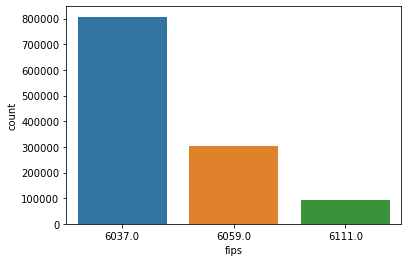

In [7]:
e.explore_uvar(train, cont_vars, cat_vars)

In [6]:
e.explore_bvar(train, 'tax_value', cont_vars, cat_vars)

KeyboardInterrupt: 